<a href="https://www.kaggle.com/code/siegfredlorellecmina/ai-avenue-2-introduction-to-computer-vision-nb-2?scriptVersionId=176311459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# AI Avenue 2: Introduction to Computer Vision

## Fine-tuning Convolutional Neural Network (CNN)

### Steps:
1. Acquire Data
2. Preprocess Data
3. Build Fine-tuned Model
4. Train Fine-tuned Model
5. Predict using the Model

In [1]:
# Import libraries used across the notebook
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import shutil
import glob
import random
import itertools

2024-05-08 09:20:08.281228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 09:20:08.281325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 09:20:08.408806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Ensure a GPU is used by TensorFlow 
GPUs = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(GPUs[0], True)
except:
    print("Dynamic memory allocation on GPU was not set.")
    
print(f"Num of GPUs: {len(GPUs)}")


Num of GPUs: 1


### 1. Acquire Data
- Download dogs vs cats dataset named 'dogs-vs-cats.zip' from [this Google Drive](https://drive.google.com/drive/folders/14xi2BkY3D8UL77kWoPN30GJOcnVyfBWf)
- Upload the dogs vs cats dataset in Kaggle



<details>
    <summary>Detailed steps?</summary>
    
<!-- 1. #### Click 'Upload'
2. #### Click 'Create New Dataset'
3. #### Upload Dataset
4. #### Name Dataset then click 'Create'
5. #### Check if Dataset is uploaded
</details>


In [3]:
# Check if dataset is downloaded

input_dataset_path = '/kaggle/input/dogs-vs-cats-for-gdsc/dogs-vs-cats'

files = os.listdir(input_dataset_path)
print(f"Num of files in input dataset: {len(files)}")


Num of files in input dataset: 25000


In [4]:
# # View all files in the dataset
# files

### 2. Preprocess Data
- Separate data by label
-  Split the dataset into three (3) subsets
    - train set
    - valid set
    - test set
- Process the data to match the model's expected input

In [5]:
# Clear/deletes all files in working directory
# Warning: Only run this to reset working directory from scratch (empty)

working_directory_path = "/kaggle/working/"

os.chdir(working_directory_path)
for file in os.listdir(working_directory_path):
    if os.path.isdir(file):
        shutil.rmtree(file)
    else:
        os.remove(file)
        
print(os.listdir(working_directory_path))

[]


In [6]:
# Copy dataset (from input) to working kaggle directory

input_dataset_path = "/kaggle/input/dogs-vs-cats-for-gdsc/dogs-vs-cats"
working_dir_path = "/kaggle/working/"

input_files = os.listdir(input_dataset_path)

src = input_dataset_path
dest = os.path.join(working_dir_path,"data")

if not os.path.exists(dest) or len(os.listdir(dest)) != len(input_files):
    shutil.copytree(src, dest, dirs_exist_ok=True)


files = os.listdir(dest)
print(f"Num of files in working directory: {len(files)}")


Num of files in working directory: 25000


In [7]:
# Create train, valid, test directories

# Move to the dataset in working directory
dataset_path = "/kaggle/working/data"
print(os.getcwd())
os.chdir(dataset_path)
print(os.getcwd())

# Create train, valid, test
train_dog_path = './train/dog'
if not os.path.exists(train_dog_path):
    os.makedirs(train_dog_path)
valid_dog_path = "./valid/dog"
if not os.path.exists(valid_dog_path):
    os.makedirs(valid_dog_path)
test_dog_path = "./test/dog"
if not os.path.exists(test_dog_path):
    os.makedirs(test_dog_path)
train_cat_path = './train/cat'
if not os.path.exists(train_cat_path):
    os.makedirs(train_cat_path)
valid_cat_path = "./valid/cat"
if not os.path.exists(valid_cat_path):
    os.makedirs(valid_cat_path)
test_cat_path = "./test/cat"
if not os.path.exists(test_cat_path):
    os.makedirs(test_cat_path)

# Check if directories are made by getting all subdirectories in working directory
dirs_in_working_dir = [file for file in os.listdir(os.getcwd()) if os.path.isdir(file)]
dirs_in_working_dir

/kaggle/working
/kaggle/working/data


['train', 'valid', 'test']

In [8]:
# Split dataset by labels
# & split into three (3) subsets

# Move to the dataset in working directory
dataset_path = "/kaggle/working/data"
print(os.getcwd())
os.chdir(dataset_path)
print(os.getcwd())



# Assign a ratio on how much of the dataset will be part of each subset 
subsets_ratio = {
    "train" : 0.7,
    "valid" : 0.2,
    "test" : 0.1,
}
# Ensure that the ratio totals to 1
subsets_ratio_sum = round(sum(subsets_ratio.values()), 1)
assert subsets_ratio_sum == 1, f"Subsets_ratio ({subsets_ratio_sum}) must be equal to 1" 

# Get the total count of filenames starting with dog or cat
# NOTE: Wildcard (*) selects all filenames starting with dog or cat
labels_total = {
    "dog": len(glob.glob("dog*")),
    "cat": len(glob.glob("cat*")),
}
    

# Split the dataset by labels and subset 
for subset, ratio in subsets_ratio.items():
    for label, total in labels_total.items():
        
        # Get a random sample of the current label by the ratio of the current subset
        num_of_files_to_move = int(ratio * total)
        files_to_move = random.sample(glob.glob(f"{label}*"), num_of_files_to_move)
        # Move the sampled files to its appropriate directory
        for file in files_to_move:
            src = file
            dest = os.path.join(subset, label)
            shutil.move(src, dest)

# Check if dataset was split correctly
for subset in subsets_ratio.keys():
    for label, total in labels_total.items():
        num_of_files = len(os.listdir(os.path.join(subset, label)))
        ratio = num_of_files / total if total else 'N/A'
        print(f"Num of files in {subset}/{label}: {num_of_files} files (ratio: {ratio})")

/kaggle/working/data
/kaggle/working/data
Num of files in train/dog: 8750 files (ratio: 0.7)
Num of files in train/cat: 8750 files (ratio: 0.7)
Num of files in valid/dog: 2500 files (ratio: 0.2)
Num of files in valid/cat: 2500 files (ratio: 0.2)
Num of files in test/dog: 1250 files (ratio: 0.1)
Num of files in test/cat: 1250 files (ratio: 0.1)


In [9]:
# # View each directory manually
# os.listdir("train/dog")
# os.listdir("train/cat")
# os.listdir("valid/dog")
# os.listdir("valid/cat")
# os.listdir("test/dog")
# os.listdir("test/cat")

In [10]:
# Process data to match the model's expected input

# Move to the dataset in working directory
dataset_path = "/kaggle/working/data"
print(os.getcwd())
os.chdir(dataset_path)
print(os.getcwd())

train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

target_size = (224, 224)
classes = ["cat","dog"]
batch_size = 64


data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_batches = data_generator.flow_from_directory(
    directory=train_path,
    target_size=target_size,
    classes=classes,
    batch_size=batch_size,
)
valid_batches = data_generator.flow_from_directory(
    directory=valid_path,
    target_size=target_size,
    classes=classes,
    batch_size=batch_size,
)
test_batches = data_generator.flow_from_directory(
    directory=test_path,
    target_size=target_size,
    classes=classes,
    batch_size=batch_size,
    shuffle=False,
)

/kaggle/working/data
/kaggle/working/data
Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
# Visualize a batch of a preprocessed images
def plotImages(imgs_arr):
    fig, cell = plt.subplots(1, 10, figsize=(15, 15))
#     axes = axes.flatten()
    for img, cell in zip(imgs_arr, cell):
#         print(cell)
        cell.imshow(img)
        cell.axis("off")
#         cell.


1: [0. 1.]
2: [0. 1.]
3: [1. 0.]
4: [0. 1.]
5: [1. 0.]
6: [1. 0.]
7: [0. 1.]
8: [0. 1.]
9: [0. 1.]
10: [1. 0.]


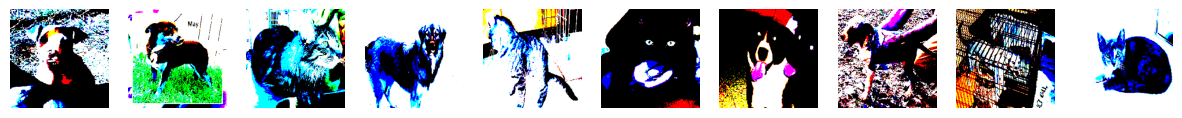

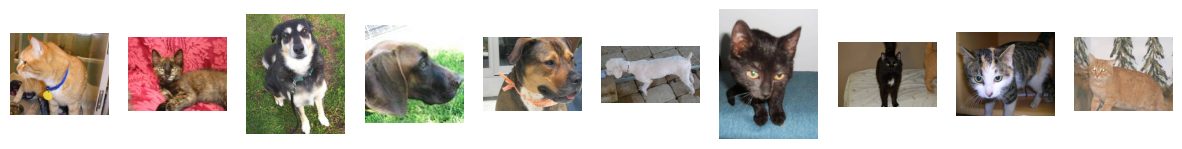

In [12]:
# Plot preprocessed images from train batch
imgs, labels = next(train_batches)
plotImages(imgs)
[print(f"{i}: {label}") for i, label in enumerate(labels, 1) if i <= 10]


# Plot random unpreprocessed images from train subset
images_paths = glob.glob(f"{dataset_path}/train/*/*")  
random_imgs = random.sample(images_paths, 10)

imgs_arr = []
for img in random_imgs:
    img = Image.open(img)
    img_arr = np.asarray(img)
    imgs_arr.append(img_arr)
plotImages(imgs_arr)

### 3. Build and Fine-tuning CNN
- Download/Grab Existing Model
- Create new model using the downloaded model's layer
- Adjust number of trainable parameters 

In [13]:
# Download/grab existing model
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [14]:
# # Check vgg16 layers
# vgg16_model.summary()

In [15]:
# Create new model using the downloaded model's layer
inputs = vgg16_model.inputs
x = vgg16_model.layers[-2].output
outputs = tf.keras.layers.Dense(
    units=2,
    activation="softmax",
) (x)

model = tf.keras.Model(
    inputs=inputs,
    outputs=outputs,
)

In [16]:
# # Check new model's layers
# model.summary()

#### Adjust number of trainable parameters based on:



In [17]:
# Adjust number of non-trainable parameters (to freeze)
num_of_layers_not_to_freeze = 1

for layer in model.layers[: -num_of_layers_not_to_freeze]:
    layer.trainable = False
    
for layer in model.layers[-num_of_layers_not_to_freeze :]:
    layer.trainable = True

In [18]:
# model.summary()

### 4. Train Fine-tuned CNN
- Prepare model for training
- Train the model
- Plot train and valid accuracy

In [19]:
# Prepare the model for training
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [20]:
#  Train the model
history = model.fit(
    x=train_batches,
#     steps_per_epoch=train_batches.n//batch_size,
    validation_data=test_batches,
#     validation_steps=valid_batches.n//batch_size,
    epochs=5,
    verbose=1,
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-08 09:23:21.267654: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[64,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-08 09:23:21.705857: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100352: 3.87759, exp

  1/274 ━━━━━━━━━━━━━━━━━━━━ 2:40:13 35s/step - accuracy: 0.6250 - loss: 1.4541

I0000 00:00:1715160231.489941      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715160231.511803      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 68/274 ━━━━━━━━━━━━━━━━━━━━ 38s 187ms/step - accuracy: 0.7358 - loss: 0.9470

2024-05-08 09:24:05.162212: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.05625, expected 3.15318
2024-05-08 09:24:05.162283: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.55379, expected 5.65073
2024-05-08 09:24:05.162298: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.40794, expected 5.50487
2024-05-08 09:24:05.162311: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.4763, expected 4.57323
2024-05-08 09:24:05.162328: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.64422, expected 4.74115
2024-05-08 09:24:05.162339: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.35747, expected 5.45441
2024-05-08 09:24:05.162349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.0426, expected 5.13953
2024-05-08 09:24:05.162367: E external/local_xla/xla/serv

 70/274 ━━━━━━━━━━━━━━━━━━━━ 1:21 401ms/step - accuracy: 0.7383 - loss: 0.9377

W0000 00:00:1715160259.103739      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.8376 - loss: 0.5677

W0000 00:00:1715160298.280058      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-05-08 09:25:05.634963: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.46848, expected 3.68847
2024-05-08 09:25:05.635029: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.72762, expected 5.94762
2024-05-08 09:25:05.635038: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.00592, expected 5.22591
2024-05-08 09:25:05.635046: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.42362, expected 5.64362
2024-05-08 09:25:05.635056: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.34585, expected 4.56585
2024-05-08 09:25:05.635063: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.68756, expected 4.90755
2024-05-08 09:25:05.635071: E external/local_xla/xla/service/gpu/

274/274 ━━━━━━━━━━━━━━━━━━━━ 113s 285ms/step - accuracy: 0.8378 - loss: 0.5669 - val_accuracy: 0.9316 - val_loss: 0.2329
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 59s 211ms/step - accuracy: 0.9344 - loss: 0.2120 - val_accuracy: 0.9400 - val_loss: 0.2011
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 59s 211ms/step - accuracy: 0.9442 - loss: 0.1732 - val_accuracy: 0.9404 - val_loss: 0.1887
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 59s 209ms/step - accuracy: 0.9502 - loss: 0.1459 - val_accuracy: 0.9420 - val_loss: 0.1775
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 59s 210ms/step - accuracy: 0.9521 - loss: 0.1306 - val_accuracy: 0.9440 - val_loss: 0.1754


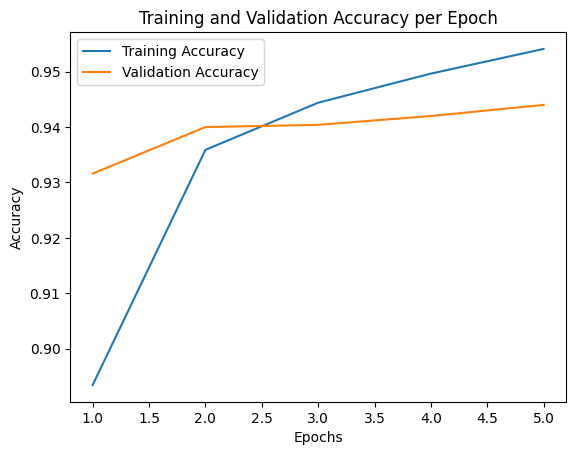

In [21]:
# Plot train and valid accuracy

train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

epochs = range(1, len(train_accuracy) + 1)

plt.plot(
    epochs,
    train_accuracy,
    label="Training Accuracy"
)

plt.plot(
    epochs,
    valid_accuracy,
    label="Validation Accuracy"
)

plt.title("Training and Validation Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

### 5. Predict using the Model
- predict images from test batches
- visualize results through confusion matrix
- compute numerical results

In [22]:
# Predict images from test batches
predictions = model.predict(
    x=test_batches,
    verbose=1,
)

 2/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step 

W0000 00:00:1715160548.053069      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape [0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
# # Check if test batches labels are still unshuffled
# for label in test_batches.classes:
#     print(label)

Confusion matrix, without normalization
[[1160   90]
 [  50 1200]]


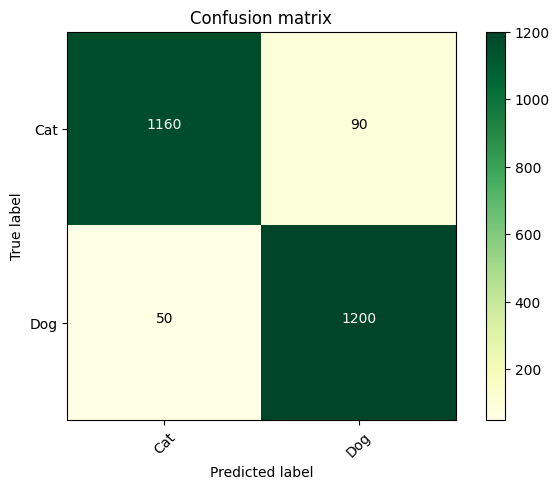

In [25]:
# Create a confusion matrix to visualize results
confusion_matrix = confusion_matrix(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions, axis=-1),
)

# Plot the confusion matrix
classes = ["Cat", "Dog"]
plot_confusion_matrix(
    cm=confusion_matrix, 
    classes=classes,
    cmap=plt.cm.YlGn,
)

In [26]:
# Numerical Results
accuracy = accuracy_score(
    test_batches.classes,
    np.argmax(predictions, axis=-1)
)

f"accuracy: {accuracy * 100:.2f}%"

'accuracy: 94.40%'

In [27]:
# Check each prediction results

    
predicted_labels = ["Cat" if np.argmax(prediction, axis=-1) == 0 else "Dog" for prediction in predictions]
true_labels = ["Cat" if label == 0 else "Dog" for label in test_batches.classes]

print(f"True : Predicted")
for i in range(len(predicted_labels)):
    print(f"{true_labels[i]} : {predicted_labels[i]} {'✅' if predicted_labels[i] == true_labels[i] else '❌'}")


True : Predicted
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Dog ❌
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Dog ❌
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Dog ❌
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Dog ❌
Cat : Cat ✅
Cat : Cat ✅
Cat : Dog ❌
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Cat ✅
Cat : Dog ❌
Cat : Cat ✅

### Additional:
- Save Model

In [28]:
# Save Model
try:
    model.save('cats-v-dogs-model.h5')
    print("Model saved successfully.")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

Model saved successfully.
